In [9]:
import pandas as pd
import pandas as pd
import glob



In [11]:
# get a list of all CSV files 
csv_files = glob.glob('../dataset/*.csv')

# create an empty dataframe to store the combined data
df = pd.DataFrame()

# loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    dfs = pd.read_csv(csv_file)
    df = pd.concat([dfs, dfs])

# print the combined dataframe
df

,job id,job_title,company_name,company_location,posted_time,description
0,3770944725,Senior Engineer (Reasoning ML),Oxa,"Toronto, Ontario, Canada",1 week ago,DescriptionWho are we? Oxa is enabling the tra...
1,3676182629,Security Research Engineer,boostsecurity.io,"Montreal, Quebec, Canada",8 months ago,About UsBoostsecurity.io is a cybersecurity te...
2,3667383636,Machine Learning Engineer,DRW,"Montreal, Quebec, Canada",4 days ago,DRW is a diversified trading firm with over 3 ...
3,3844560336,Research Scientist,Moonvalley,"Toronto, Ontario, Canada",1 week ago,We are building the world’s most capable found...
4,3787761945,Full Stack Developer,Caredove,"Orillia, Ontario, Canada",2 months ago,The CompanyMost of us have had ailing family m...
...,...,...,...,...,...,...
4684,3856520609,HR Operations Coordinator,Mastech Digital,"Pittsburgh, PA",1 hour ago,Organizational Structure And Impact: · Describ...
4685,3856521814,"Community Lead, Denver",WeWork,"Denver, CO",45 minutes ago,Senior Community Lead | Community About UsAt W...
4686,3856506644,Supply Chain Planner,Mindlance,"North Dakota, United States",1 hour ago,"Onsite role at Fargo, ND - Supply Chain Planne..."
4687,3856520600,Executive Office-Corporate Communications Asso...,Goldman Sachs,"New York, NY",46 minutes ago,Job DescriptionExecutive Office- Corporate Com...


In [12]:
#drop the duplicate value 
df.drop_duplicates(subset=['job id'],inplace=True)

In [13]:
#shape after dropping duplicate values
df.shape

(2137, 6)

In [44]:
pip install dateparser

Note: you may need to restart the kernel to use updated packages.


In [45]:
dates= df['posted_time'].tolist()
posted_date=[]
for i in dates:
    date= dateparser.parse(str(i))
    date = date.strftime("%Y-%m-%d")
    posted_date.append(date)
                           
                           

df['posted_date']= posted_date

In [46]:
df.head()

,job id,job_title,company_name,company_location,posted_time,description,posted_date
0,3856120323,Vice President of Customer Support,Motion Recruitment,"Atlanta, GA",1 hour ago,Vice President of Customer SupportAs the Vice ...,2024-03-13
1,3852723097,Sr. Customer Success Manager,Social Benefit,"Los Angeles, CA",28 minutes ago,Job OverviewSocial Benefit is seeking a Senior...,2024-03-13
2,3855972061,Night Warehouse Order Selector,Direct Employers Jobs,"Kailua-Kona, HI",2 hours ago,Compensation: $21.00/HourPosition SummaryThis ...,2024-03-13
3,3856133377,Marketing/Social Media Intern,FTC,"New York, NY",1 hour ago,FTC Marketing and Social Media InternshipOverv...,2024-03-13
4,3856133739,Product Manager,Oddball,United States,50 minutes ago,Oddball believes that we can bring change and ...,2024-03-13


In [47]:
df['company_location'].nunique()

1201

In [48]:
df['job_title'].nunique()

2688

In [49]:
df['company_name'].nunique()


2226

In [50]:
df['posted_date'].nunique()

24

In [52]:
df.isna().sum()

job id              0
job_title           3
company_name        3
company_location    3
posted_time         3
description         3
posted_date         0
dtype: int64

In [54]:
df.dropna(inplace=True)

In [55]:
df.isna().sum()

job id              0
job_title           0
company_name        0
company_location    0
posted_time         0
description         0
posted_date         0
dtype: int64

In [103]:
df.info()
# from this we can see that all of our data is categorical , we have dealt with the missing values and after removing 
#duplicate columns we have total of 8032 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8032 entries, 0 to 4685
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job id            8032 non-null   object
 1   job_title         8032 non-null   object
 2   company_name      8032 non-null   object
 3   company_location  8032 non-null   object
 4   posted_time       8032 non-null   object
 5   description       8032 non-null   object
 6   posted_date       8032 non-null   object
dtypes: object(7)
memory usage: 502.0+ KB


In [69]:
df.groupby(['company_name','job_title']).count()[:5]

job id  \
company_name                       job_title                               
1-888-MDSEARCH, Inc.               Cardiac Anesthesia                  2   
1199SEIU Benefit and Pension Funds Quality Control Reviewer III        1   
24 Seven Talent                    Copywriter                          2   
                                   Copywriter (full-time Remote)       2   
                                   Marketing Associate (B2B)           1   

                                                                  company_location  \
company_name                       job_title                                         
1-888-MDSEARCH, Inc.               Cardiac Anesthesia                            2   
1199SEIU Benefit and Pension Funds Quality Control Reviewer III                  1   
24 Seven Talent                    Copywriter                                    2   
                                   Copywriter (full-time Remote)                 2   
                                   Marketing Associate (B2B)                     1   

                                                                  posted_time  \
company_name                       job_title                                    
1-888-MDSEARCH, Inc.               Cardiac Anesthesia                       2   
1199SEIU Benefit and Pension Funds Quality Control Reviewer III             1   
24 Seven Talent                    Copywriter                               2   
                                   Copywriter (full-time Remote)            2   
                                   Marketing Associate (B2B)                1   

                                                                  description  \
company_name                       job_title                                    
1-888-MDSEARCH, Inc.               Cardiac Anesthesia                       2   
1199SEIU Benefit and Pension Funds Quality Control Reviewer III             1   
24 Seven Talent                    Copywriter                               2   
                                   Copywriter (full-time Remote)            2   
                                   Marketing Associate (B2B)                1   

                                                                  posted_date  
company_name                       job_title                                   
1-888-MDSEARCH, Inc.               Cardiac Anesthesia                       2  
1199SEIU Benefit and Pension Funds Quality Control Reviewer III             1  
24 Seven Talent                    Copywriter                               2  
                                   Copywriter (full-time Remote)            2  
                                   Marketing Associate (B2B)                1

In [66]:
df.groupby('job_title')['job id'].count()[:5]

job_title
$300/hr - Locum Anesthesiologist               2
(Concentrated/Long-only) Investment Analyst    2
(US) Project Manager, Acute & Payer            2
*Lifeguard (Indoor) * $19.00/hr                2
*Pharmacist                                    4
Name: job id, dtype: int64

In [76]:
df.job_title.mode()

0    Orthodontist
Name: job_title, dtype: object

In [87]:
df[df['job_title']=='Data Scientist']

,job id,job_title,company_name,company_location,posted_time,description,posted_date
40,3813401609,Data Scientist,CPKC,"Calgary, Alberta, Canada",3 days ago,Canadian Pacific (CP) and Kansas City Southern...,2024-03-10
63,3850504548,Data Scientist,Benchmark Recruitment,"Vancouver, British Columbia, Canada",1 day ago,Job Title: Data Scientist2-year term employmen...,2024-03-12
90,3802376320,Data Scientist,Kabam,"Vancouver, British Columbia, Canada",2 weeks ago,"At Kabam, we’re constantly raising the bar of ...",2024-02-28
109,3844087769,Data Scientist,mlHealth 360,"Surrey, British Columbia, Canada",4 days ago,About the Role: Join mlHealth 360 as a Data Sc...,2024-03-09
117,3848813368,Data Scientist,EHN Canada,"Toronto, Ontario, Canada",5 days ago,EHN Canada is the nation's largest private pro...,2024-03-08
...,...,...,...,...,...,...,...
1546,3855987436,Data Scientist,The Lab Consulting,Greater Houston,29 minutes ago,"We are a mid-sized Management Consulting, Auto...",2024-03-13
3230,3848861048,Data Scientist,UNFCU,"Queens, NY",6 days ago,Why join this team This role is the first of i...,2024-03-07
6743,3856515261,Data Scientist,Visa,"Foster City, CA",31 minutes ago,Company DescriptionVisa is a world leader in p...,2024-03-13
6933,3856520287,Data Scientist,ecocareers,"Chicago, IL",50 minutes ago,Country:United StatesCities:ChicagoArea of exp...,2024-03-13


In [95]:
#top 10 most frequent job title
import matplotlib.pyplot as plt
import seaborn as sns

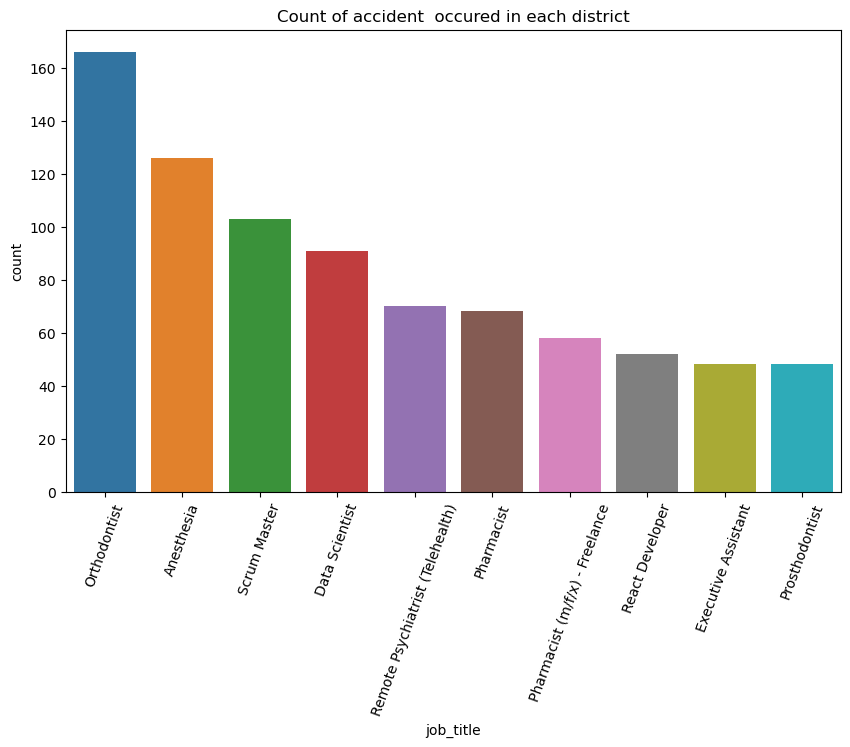

In [100]:
#using a countplot to plotmost frequent job title
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='job_title',order=df['job_title'].value_counts()[:10].index)
plt.xticks(rotation=70)
plt.title('Count of accident  occured in each district')
plt.show()

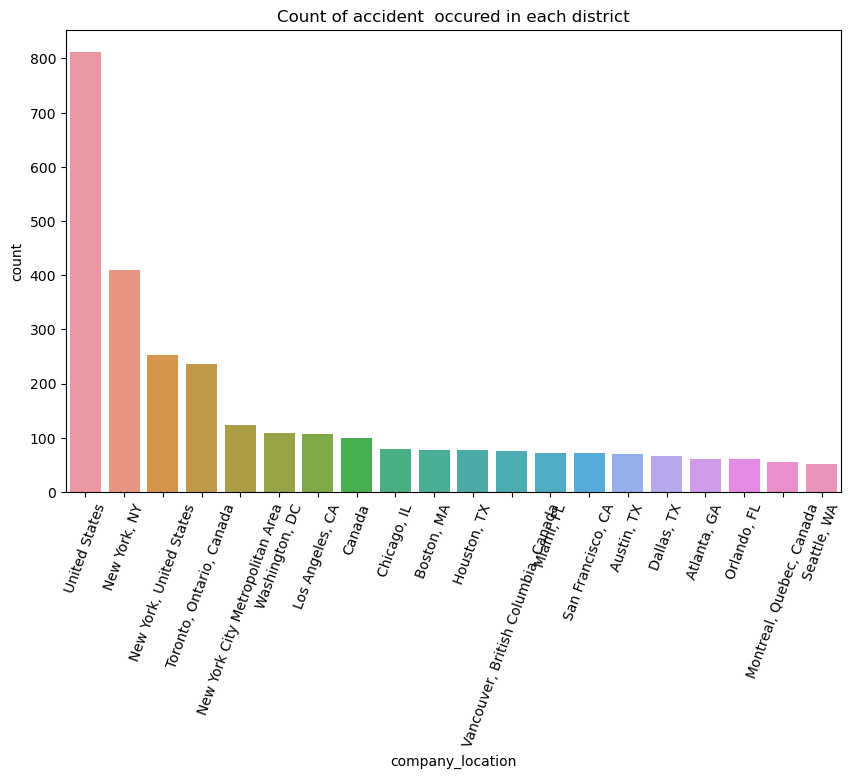

In [113]:
#using a countplot to plot company_name
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='company_location',order=df['company_location'].value_counts()[:20].index)
plt.xticks(rotation=70)
plt.title('Count of accident  occured in each district')
plt.show()

In [ ]:
#using a countplot to plotmost frequent job title
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='job_title',order=df['job_title'].value_counts()[:10].index)
plt.xticks(rotation=70)
plt.title('Count of accident  occured in each district')
plt.show()

<Axes: ylabel='posted_date'>

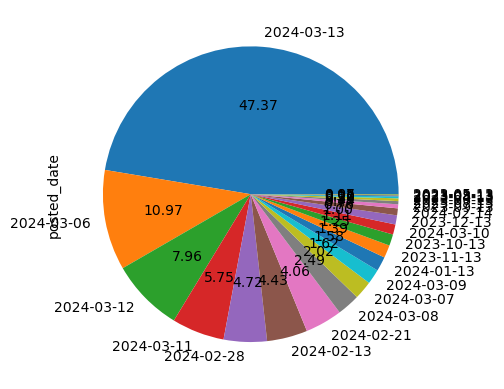

In [102]:
#pie-chart to see what time of the year has highest job posting 
df['posted_date'].value_counts().plot(kind='pie',autopct='%.2f')

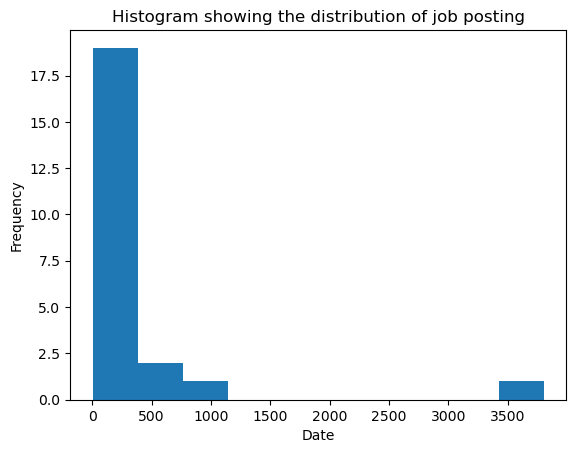

In [109]:
plt.hist(df['posted_date'].value_counts())
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram showing the distribution of job posting')
plt.show()

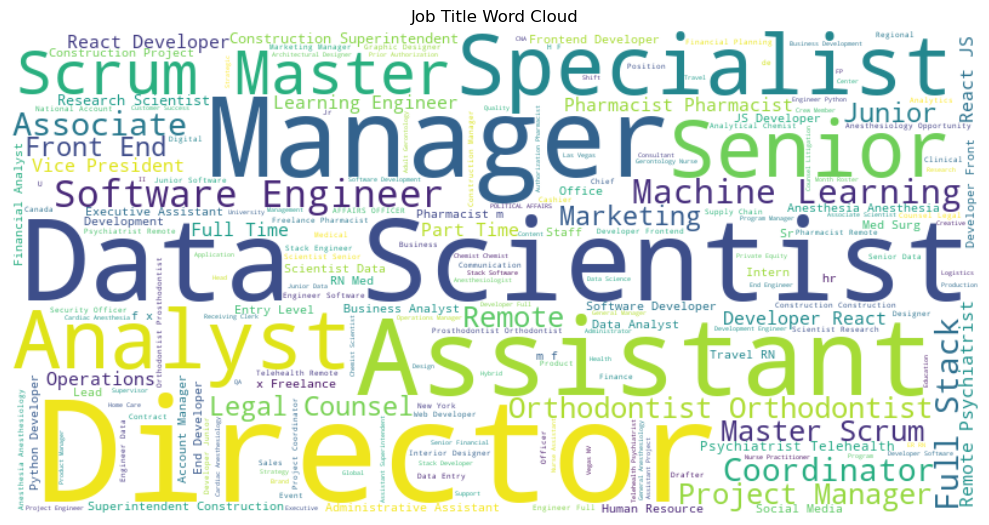

In [111]:
#Visualisation of Job Title WordCloud
# Visualization 1: Creating a word cloud from job titles
from wordcloud import WordCloud
job_titles_text = ' '.join(df['job_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Job Title Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()

In [147]:
df['company_location'][:30]

0                         Atlanta, GA
1                     Los Angeles, CA
2                     Kailua-Kona, HI
3                        New York, NY
4                       United States
5     New York City Metropolitan Area
6     New York City Metropolitan Area
7                       United States
8                     Springville, UT
9                     North Miami, FL
10                    Bloomington, IL
11                       New York, NY
12                    New Orleans, LA
13                         Cadott, WI
14                      United States
15                          Arden, NC
16                         Dallas, TX
17                      Tobyhanna, PA
18                     Hackensack, NJ
19                    Los Angeles, CA
20                    Wake Forest, NC
21                    Mount Kisco, NY
22                  Oklahoma City, OK
23                      Rochester, NY
24                        Chicago, IL
25                     El Segundo, CA
26          

In [6]:
pip install ydata_profiling


  Obtaining dependency information for ydata_profiling from https://files.pythonhosted.org/packages/04/45/647c0ebe33584476c335d789a55005683cfa640e07796266de8557560850/ydata_profiling-4.6.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for visions[type_image_path]==0.7.5 from https://files.pythonhosted.org/packages/62/fa/6a8539c83d2ccbd08d5f0c843b1784af9ff514e77f4c9d5d6800fdd340f6/visions-0.7.5-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for phik<0.13,>=0.11.1 from https://files.pythonhosted.org/packages/b9/69/a42d9320b68b0d43d78db46787669b2287cba5e8db2e83fe0d63c1fd6945/phik-0.12.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for multimethod<2,>=1.4 from https://files.pythonhosted.org/packages/a0/96/47dc456936530adb1360aba7300f2da2e1d277fb361e025db3926653e189/multimethod-1.11.2-py3-none-any.whl.metadata
  Obtaining dependency information for typeguard<5,>=4.1.2 from https://file

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.3/657.3 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cdc509a74f97e0b1c842708e503b527cbe45acf9c08d1901e722823d1e459832
  Stored in directory: /Users/shreyabaral/Library/Caches/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")

In [17]:
profile.to_notebook_iframe()

In [18]:
profile.to_file('Linkedln jobs profile.html')

/Users/shreyabaral/anaconda3/lib/python3.11/site-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]